In [34]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(ecommerce-customer-device-usage, Ecommerce Customers))
data= pd.read_csv("../input/ecommerce-customer-device-usage/Ecommerce Customers")
data.head()
# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [35]:
data.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


# Plotting the histograms for each feature.
To see the dispersion of the data points over the plot

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f62b676cb50>,
      dtype=object)

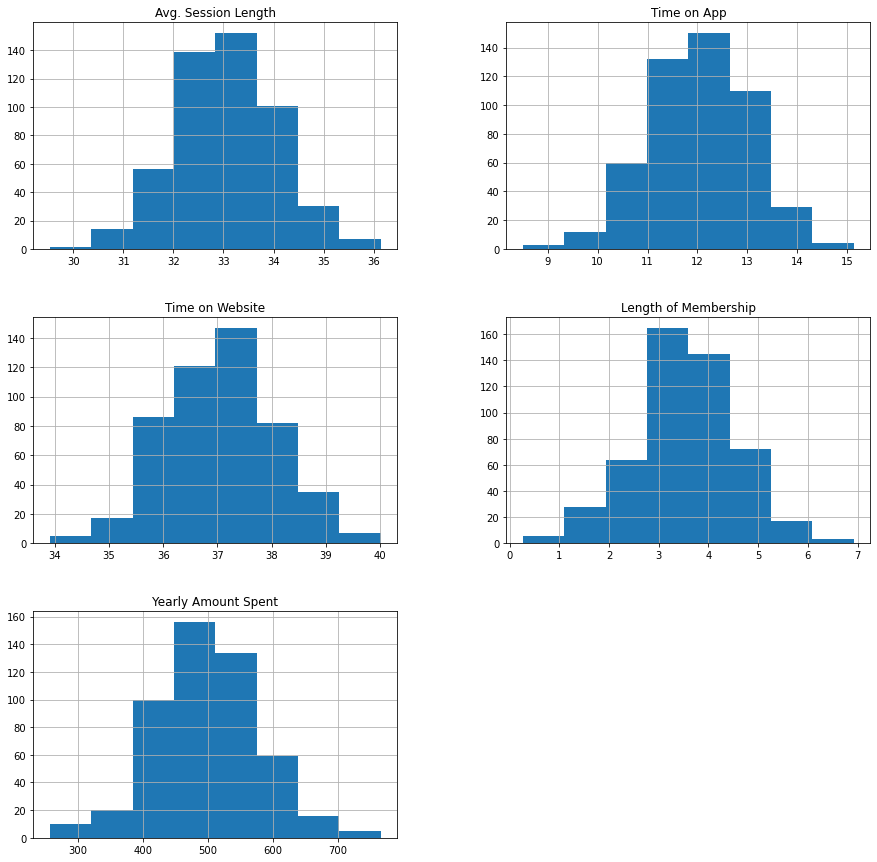

In [37]:
%matplotlib inline
data.hist(bins= 8, figsize= (15, 15))

# Looking for Correlation 

In [38]:
corr_matrix= data.corr()
corr_matrix["Yearly Amount Spent"].sort_values(ascending= False)

Yearly Amount Spent     1.000000
Length of Membership    0.809084
Time on App             0.499328
Avg. Session Length     0.355088
Time on Website        -0.002641
Name: Yearly Amount Spent, dtype: float64

**From the correlation matrix, We can see that the best predictor of Yearly Amount Spent is Length of Membership**
Now, We can see the plot of a histogram shows the number of instances (on the vertical axis) that have a given value range (on the horizontal axis). 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f62c80d1d90>,
      dtype=object)

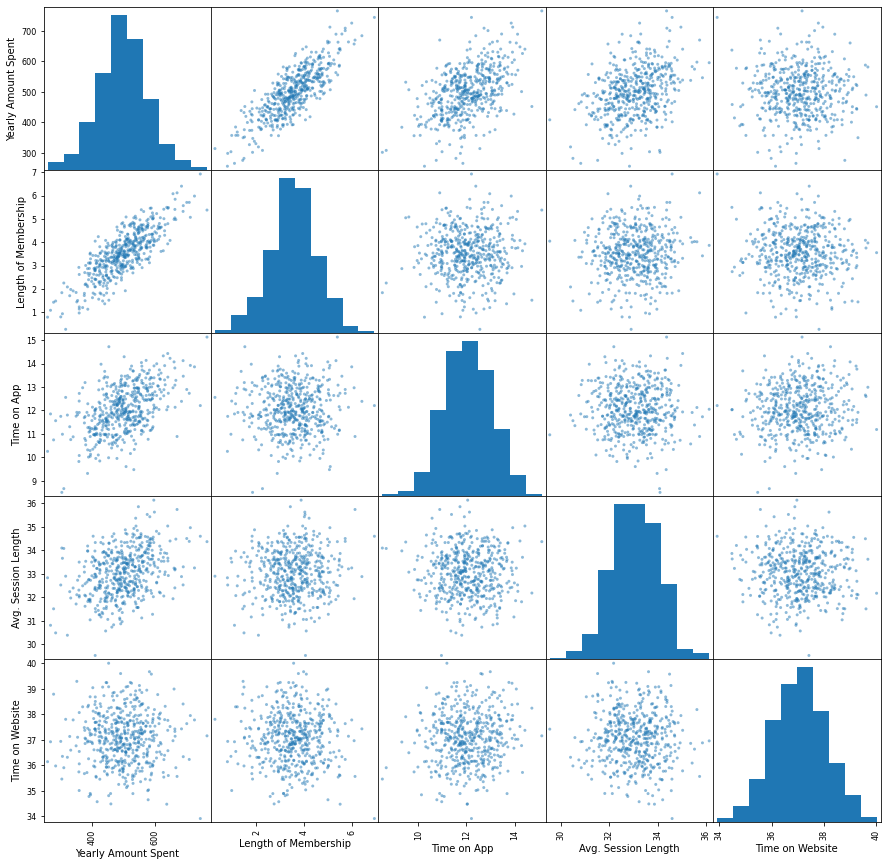

In [39]:
from pandas.plotting import scatter_matrix

attributes= ["Yearly Amount Spent","Length of Membership", "Time on App", "Avg. Session Length", "Time on Website"]
scatter_matrix(data[attributes], figsize=(15, 15))

**We can clearly see that Yearly Amount Spent is linearly dependent on Length of Membership. So, We must include Length of Membership as a feature.**
Now let's look at Length of Membership more closely. Inorder to do that let's take ceil of Length of Membership and add this new feature in the dataset.

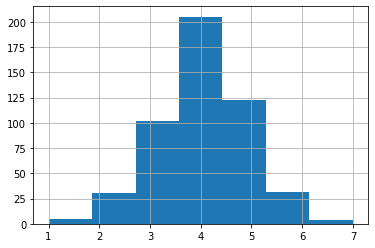

In [40]:
data["Ceil_LoM"]= np.ceil(data["Length of Membership"])
data["Ceil_LoM"].hist(bins= 7)

**We can clearly see that there are more than 300 datapoints that lie between 3 and 5, so, while splitting our dataset into training and test set, it is possible that many instances are missed from value <3 and >5. That's why we have to use stratiefiedShuffleSplit so that, all the instances are well covered in same proportion in both training and test set.**

In [41]:
from sklearn.model_selection import StratifiedShuffleSplit

split= StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state= 42)
for train_index, test_index in split.split(data, data["Ceil_LoM"]):
    strat_train= data.iloc[train_index]
    strat_test= data.iloc[test_index]


**Let's see if that worked it's charm**

In [42]:
#To know the proportion of each data point in the entire data set
data["Ceil_LoM"].value_counts()/ len(data)

4.0    0.410
5.0    0.246
3.0    0.204
6.0    0.062
2.0    0.060
1.0    0.010
7.0    0.008
Name: Ceil_LoM, dtype: float64

In [43]:
#To know the proportion of each data point in the training set
strat_train["Ceil_LoM"].value_counts()/ len(strat_train)

4.0    0.4100
5.0    0.2450
3.0    0.2050
6.0    0.0625
2.0    0.0600
1.0    0.0100
7.0    0.0075
Name: Ceil_LoM, dtype: float64

In [44]:
#To know the proportion of each data point in the test set
strat_test["Ceil_LoM"].value_counts()/ len(strat_test)

4.0    0.41
5.0    0.25
3.0    0.20
6.0    0.06
2.0    0.06
1.0    0.01
7.0    0.01
Name: Ceil_LoM, dtype: float64

**Well, I got to say it works like charm. Now that we have got ourselves training set and test set, we must get rid of that extra column that we added**

In [45]:
for set in strat_train, strat_test:
    set.drop(["Ceil_LoM"], axis= 1, inplace= True)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4164: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


**Now that we have got ourselves a training and test set well proportionated, We have to separate our features and label**

In [46]:
X= strat_train[['Avg. Session Length','Time on App','Time on Website','Length of Membership']]

y= strat_train["Yearly Amount Spent"]


**Training a linear Regression Model**

In [57]:
from sklearn.linear_model import LinearRegression
lin_reg= LinearRegression()
lin_reg.fit(X, y)

lin_reg.coef_

array([25.88288932, 38.62204947,  0.56133026, 61.42919992])

**Now that our Linear Regression Model is trained, we'll evaluate our model in cross-validatin set**

In [56]:
from sklearn.model_selection import cross_val_score
scores= cross_val_score(lin_reg, X, y, scoring="neg_mean_squared_error", cv=10)
rmse_score= np.sqrt(-scores)

def display_scores(score):
    print("Scores:", score)
    print("Mean:", score.mean())
    print("Standard Deviation:",score.std())
display_scores(rmse_score)

Scores: [ 9.47694176 10.82588213 10.24348706 10.07597605  8.71879613  8.70411287
 12.39279332  9.06451772 10.73451884 10.63363994]
Mean: 10.087066580598215
Standard Deviation: 1.0866156142881078


**Now, Let's try our model in test set**

Text(0, 0.5, 'Predicted Y')

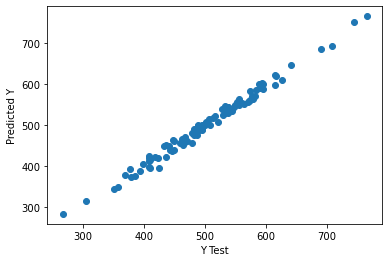

In [58]:
X_test= strat_test[['Avg. Session Length','Time on App','Time on Website','Length of Membership']]

y_test= strat_test["Yearly Amount Spent"] 

predictions= lin_reg.predict(X_test)

plt.scatter(y_test,predictions, )
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

# **Evaluating our model**

In [60]:
from sklearn import metrics

print('MAE :'," ", metrics.mean_absolute_error(y_test,predictions))
print('MSE :'," ", metrics.mean_squared_error(y_test,predictions))
print('RMAE :'," ", np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE :   8.161676702091528
MSE :   93.17854192269544
RMAE :   9.652903289824023
